# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Bimo Birra
- **Email:** bimobirra42@gmail.com
- **ID Dicoding:** bimo_birra

## Menentukan Pertanyaan Bisnis

- Berapa banyak penjualan yang terjadi di e-commerce tersebut per bulan?
- Apa saja kategori produk yang banyak terjual dan sedikit terjual?
- Bagaimana demografi dari buyer di e-commerce kita?
- Kapan buyer terakhir kali melakukan transaksi?
- Seberapa sering buyer melakukan transaksi?
- Berapa banyak uang yang dihabiskan buyer di e-commerce kita?


## Import Semua Packages/Library yang Digunakan

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [153]:
customers_df = pd.read_csv('customers_dataset.csv')
geolocation_df = pd.read_csv('geolocation_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')
order_payments_df = pd.read_csv('order_payments_dataset.csv')
orders_df = pd.read_csv('orders_dataset.csv')
product_category_name_translation_df = pd.read_csv('product_category_name_translation.csv')
products_df = pd.read_csv('products_dataset.csv')

In [154]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [155]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [156]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [157]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [158]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [159]:
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [160]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- product_category_name bukan merupakan Bahasa Indonesia maupun Bahasa Inggris, jadi kita perlu menerjemahkannya menggunakan tabel product_category_name_translation
- Data di atas terdiri dari banyak sekali kolom dan baris, dan ada yang mencapai 900ribu baris

### Assessing Data

####Assesing Customers Dataset

In [162]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [163]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [164]:
customers_df.duplicated().sum()

0

In [165]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


####Assesing Geolocation Dataset

In [166]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [167]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [168]:
geolocation_df.duplicated().sum()

261831

In [169]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [170]:
geolocation_df[geolocation_df.duplicated()].sort_values(by='geolocation_zip_code_prefix', ascending=True)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1435,1001,-23.549292,-46.633559,sao paulo,SP
771,1001,-23.550498,-46.634338,sao paulo,SP
596,1001,-23.550498,-46.634338,sao paulo,SP
1004,1001,-23.549292,-46.633559,sao paulo,SP
1246,1001,-23.549292,-46.633559,sao paulo,SP
...,...,...,...,...,...
1000045,99980,-28.388342,-51.845194,david canabarro,RS
1000129,99980,-28.387059,-51.848964,david canabarro,RS
1000002,99980,-28.388342,-51.845194,david canabarro,RS
1000133,99980,-28.386689,-51.847091,david canabarro,RS


####Assesing Order Items Dataset

In [171]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [172]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [173]:
order_items_df.duplicated().sum()

0

In [174]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


####Assesing Order Payments Dataset

In [175]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [176]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [177]:
order_payments_df.duplicated().sum()

0

In [178]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


####Assesing Order Dataset

In [179]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [180]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [181]:
orders_df.duplicated().sum()

0

In [182]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


####Assesing Product Category Name Translation Dataset

In [183]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [184]:
product_category_name_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [185]:
product_category_name_translation_df.duplicated().sum()

0

In [186]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


####Assesing Products Dataset

In [187]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [188]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [189]:
products_df.duplicated().sum()

0

In [190]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Ada tabel yang sudah bersih dan juga ada yang belum
- Masalah yang terdapat berupa missing values, duplicated

### Cleaning Data

####Customer Data Cleaning

In [195]:
#Menambahkan kolom baru, agar tidak menampilkan id customer saat RFM Analysis
custom_id = [i for i in range(0, 99441)]

customers_df['custom_id'] = custom_id
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,custom_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,2
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,3
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,4


####Geolocation Data Cleaning

In [196]:
#Drop kolom yang tidak dibutuhkan
geolocation_df.drop(['geolocation_lat', 'geolocation_lng'], axis=1, inplace=True)

#Drop duplicated data
geolocation_df.drop_duplicates(inplace=True)

In [197]:
#Cek duplicated data
geolocation_df.duplicated().sum()

0

In [198]:
#Reset Index agar rapi
geolocation_df.reset_index(inplace=True)

In [199]:
geolocation_df

,index,geolocation_zip_code_prefix,geolocation_city,geolocation_state
0,0,1037,sao paulo,SP
1,1,1046,sao paulo,SP
2,3,1041,sao paulo,SP
3,4,1035,sao paulo,SP
4,5,1012,são paulo,SP
...,...,...,...,...
27907,999806,99940,ibiaçá,RS
27908,999846,99952,santa cecilia do sul,RS
27909,999867,99970,ciríaco,RS
27910,999891,99930,estação,RS


####Orders Data Cleaning

In [200]:
#Drop kolom yang tidak dibutuhkan
orders_df.drop(['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1, inplace=True)

#Ubah tipe data
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.date

In [201]:
#Cek missing value
orders_df.isna().sum()

#Cek duplicated value
orders_df.duplicated().sum()

0

####Product Data Cleaning

In [202]:
#Translate kolom kategori di tabel products
translated_products_df = products_df.merge(product_category_name_translation_df, on='product_category_name', how='left')

#Drop kolom yang tidak dibutuhkan
translated_products_df.drop(['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1, inplace=True)

#Ubah nama kolom
translated_products_df.rename(columns={'product_category_name_english' : 'category_name'}, inplace=True)

translated_products_df.head()

,product_id,category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [203]:
#Mengisi data kosong dengan kategori other untuk mencegah kehilangan banyak data
translated_products_df.category_name.fillna('Other', inplace=True)

<ipython-input-203-48325ec986c9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  translated_products_df.category_name.fillna('Other', inplace=True)


In [204]:
#Cek missing values
translated_products_df.isna().sum()

,0
product_id,0
category_name,0


**Insight:**
- Ada kolom tidak dibutuhkan yang mengandung nilai NaN, jadi cara terbaik adalah dengan cara drop
- Menggunakan metode imputasi untuk missing value berupa mengisi missing data dengan 'Other' untuk mencegah kehilangan banyak data
- Cara terbaik untuk mengatasi duplicated values adalah dengan cara drop

## Exploratory Data Analysis (EDA)

### Explore ...

In [205]:
#Pertanyaan 1
#Penjualan terbesar per hari
orders_df.groupby('order_purchase_timestamp').agg({
    'order_id' : 'count'
}).sort_values(by='order_id', ascending=False).head()

,order_id
order_purchase_timestamp,
2017-11-24,1176
2017-11-25,499
2017-11-27,403
2017-11-26,391
2017-11-28,380


In [206]:
#Pertanyaan 2
#Menggabungkan terjemahan
order_items_products_df = order_items_df.merge(translated_products_df, on='product_id', how='left')
order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [207]:
#Kategori yang banyak dibeli
order_items_products_df.groupby('category_name').agg({
    'order_id' : 'count'
}).sort_values(by='order_id', ascending=False).head()

,order_id
category_name,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827


In [208]:
#Kategori yang sedikit dibeli
order_items_products_df.groupby('category_name').agg({
    'order_id' : 'count'
}).sort_values(by='order_id', ascending=True).head()

,order_id
category_name,
security_and_services,2
fashion_childrens_clothes,8
la_cuisine,14
cds_dvds_musicals,14
arts_and_craftmanship,24


In [209]:
#Pertanyaan 3
#Gabungkan tabel Customers dengan geolocation
customers_geolocation_df = customers_df.merge(geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

#Gabungkan tabel orders dengan Customer Geolocation
orders_customers_geolocation_df = orders_df.merge(customers_geolocation_df, on='customer_id', how='left')

#Gabungkan tabel order_payments dengan orders_customers_geolocation_df
orders_customers_geolocation_payments_df = orders_customers_geolocation_df.merge(order_payments_df, on='order_id', how='left')
orders_customers_geolocation_payments_df.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,custom_id,index,geolocation_zip_code_prefix,geolocation_city,geolocation_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,70296,44775.0,3149.0,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,70296,44775.0,3149.0,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,70296,44775.0,3149.0,sao paulo,SP,2.0,voucher,1.0,18.59
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,70296,46857.0,3149.0,são paulo,SP,1.0,credit_card,1.0,18.12
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,70296,46857.0,3149.0,são paulo,SP,3.0,voucher,1.0,2.00


In [211]:
#Merge all table
all_df = orders_customers_geolocation_payments_df.merge(order_items_products_df, on='order_id', how='left')
all_df.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,custom_id,index,geolocation_zip_code_prefix,...,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,70296,44775.0,3149.0,...,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,70296,44775.0,3149.0,...,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,70296,44775.0,3149.0,...,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,70296,46857.0,3149.0,...,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,70296,46857.0,3149.0,...,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares


In [212]:
#Demografi dari buyer
#Buyer
all_df.groupby('customer_city').agg({
    'custom_id' : 'count'
}).sort_values(by='custom_id', ascending=False)

,custom_id
customer_city,
sao paulo,37405
rio de janeiro,8383
brasilia,5741
belo horizonte,3280
sao bernardo do campo,2304
...,...
sao jose dos cordeiros,1
conceicao do caninde,1
conceicao da ibitipoca,1


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak penjualan yang terjadi di e-commerce tersebut per bulan?

In [214]:
#Convert to date time
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

monthly_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'custom_id' : 'nunique'
})

monthly_df.index = monthly_df.index.strftime('%Y-%m')
monthly_df.reset_index(inplace=True)
monthly_df.rename(columns={
    'order_purchase_timestamp' : 'month',
    'custom_id' : 'total_order',
}, inplace=True)

<ipython-input-214-cb1d1cb340fc>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({


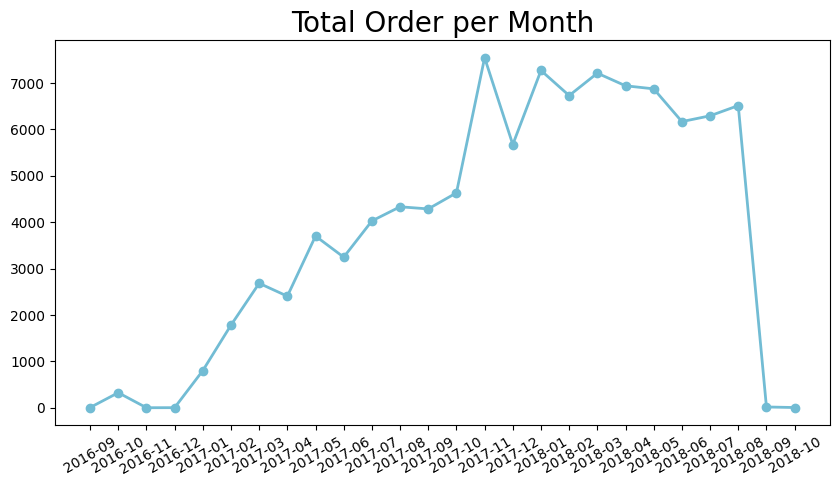

In [215]:
# monthly_df.month = monthly_df.month.strftime('%B')
plt.figure(figsize=(10,5))
plt.plot(monthly_df['month'], monthly_df['total_order'], marker='o', linewidth=2, color="#72BCD4")
plt.title('Total Order per Month', loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Apa saja kategori produk yang banyak terjual dan sedikit terjual?

<ipython-input-229-2da135a2fb40>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_id', y='category_name', data= bycategory_df.sort_values(by='order_id', ascending=False).head(5), ax=ax[0], palette=colors)
<ipython-input-229-2da135a2fb40>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_id', y='category_name', data= bycategory_df.sort_values(by='order_id', ascending=True).head(5), ax=ax[1], palette=colors)


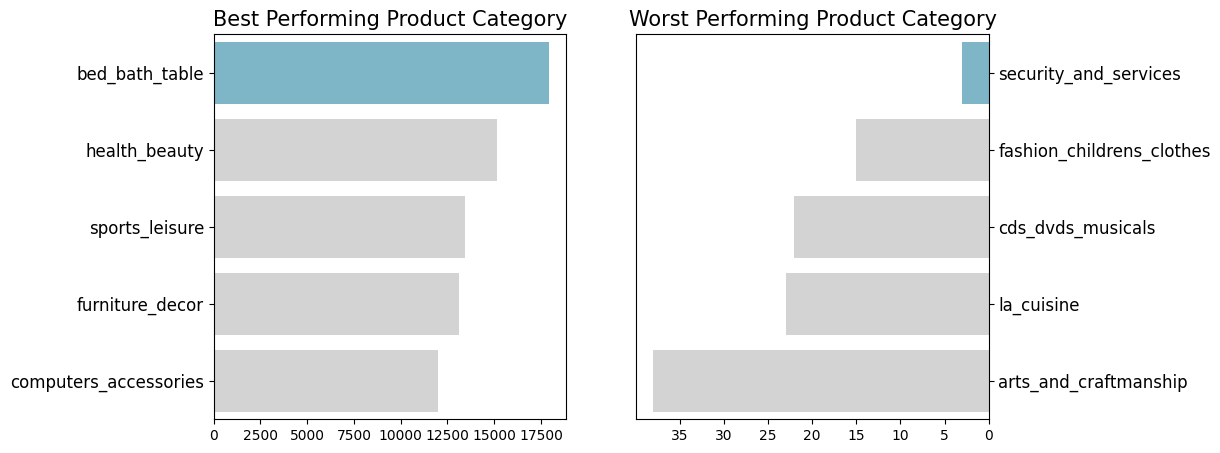

In [229]:
bycategory_df = all_df.groupby('category_name').agg({
    'order_id': 'count'
})

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.barplot(x='order_id', y='category_name', data= bycategory_df.sort_values(by='order_id', ascending=False).head(5), ax=ax[0], palette=colors)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product Category", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x='order_id', y='category_name', data= bycategory_df.sort_values(by='order_id', ascending=True).head(5), ax=ax[1], palette=colors)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product Category", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

###Pertanyaan 3: Bagaimana demografi dari buyer di e-commerce kita?



<ipython-input-237-5f2f17b45428>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='custom_id', y='customer_city', data=bycity_df.sort_values(by='custom_id', ascending=False).head(10), palette=colors)


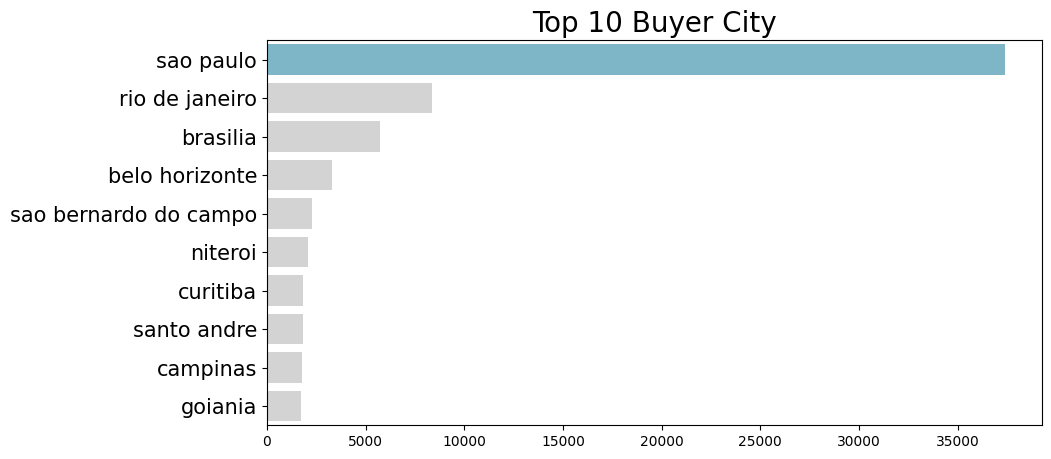

In [237]:
bycity_df = all_df.groupby('customer_city').agg({
    'custom_id': 'count'
})

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10,5))
sns.barplot(x='custom_id', y='customer_city', data=bycity_df.sort_values(by='custom_id', ascending=False).head(10), palette=colors)
plt.title('Top 10 Buyer City', loc='center', fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=15)
plt.show()

**Insight:**
- Dari Visualisasi data, bisa kita simpulkan bahwa dengan customisasi seperti warna, title, dan label dapat membuat data kita lebih mudah dipahami

## Analisis Lanjutan (Opsional)

In [244]:
#RFM Analysis
rfm_df = all_df.groupby('custom_id', as_index=False).agg({
    'order_purchase_timestamp' : 'max',
    'order_id' : 'count',
    'payment_value' : 'sum'
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp'])

recent_date = pd.to_datetime(orders_df['order_purchase_timestamp'].max())
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)
rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df

,customer_id,frequency,monetary,recency
0,0,1,146.87,519
1,1,2,670.96,278
2,2,2,315.46,151
3,3,1,173.30,218
4,4,1,252.25,80
...,...,...,...,...
99436,99436,2,177.56,193
99437,99437,2,258.12,196
99438,99438,1,56.04,192
99439,99439,1,711.07,348


<ipython-input-245-af7d5f90629b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-245-af7d5f90629b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-245-af7d5f90629b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(b

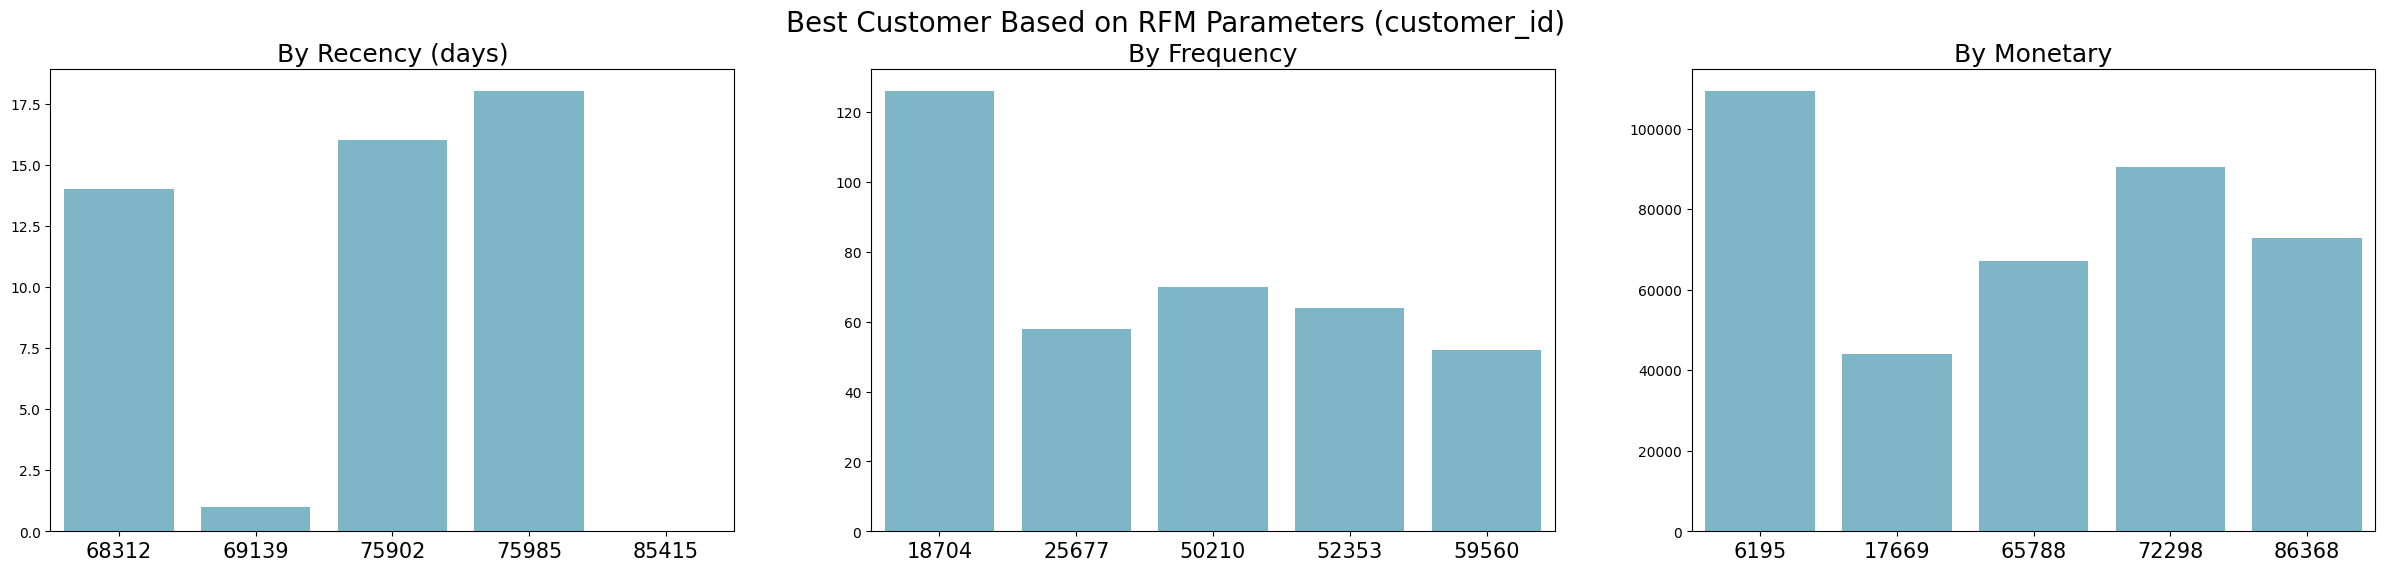

In [245]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- **Conclusion pertanyaan 1**
Dari visualisasi di atas, bisa kita lihat kalau pada tahun 2016 masih sangat sedikit terjadi penjualan dan itu mungkin bisa terjadi karena e-commerce tersebut baru dibuat. Dan pada pada bulan 8 tahun 2018 mungkin terjadi sesuatu sehingga mungkin menyebabkan e-commerce tersebut tutup.
- **Conclusion pertanyaan 2**
Dari visualisasi di atas, bisa kita simpulkan bahwa 5 kategori barang yang paling banyak dibeli berupa Bed Bath Table, Health Beauty, Sports Leisure, Furniture Decor, Computers Accessories 5 kategori barang yang paling sedikit dibeli berupa Security and Services, Fashion Children Clothes, Cds, Dvds, and Musicals, La Cuisine, Arts and Craftmanship
- **Conclusion pertanyaan 3** Dari visualisasi di atas, dapat kita simpulkan buyer terbanyak berasal dari Sao Paolo, Rio de Janeiro, dan Brasilia
- **Conclusion pertanyaan 4** Buyer dengan recency paling rendah memiliki custom_id 69139
- **Conclusion pertanyaan 5** Buyer dengan frequency tertinggi memilikki custom_id 18704
- **Conclusion pertanyaan 6** Buyer dengan monetary tertinggi meiliki custom_id 6195